In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from scripts.time_series_model_training import *

In [4]:
forecaster = TimeSeriesForecaster("../data/SPY_historical_data.csv")

In [5]:
SPY_df = forecaster._load_data()

In [6]:
forecaster.scale_data("../models/SPY_scaler.pkl")

In [7]:
forecaster.split_data()

In [8]:
xs, ys = forecaster.create_sequences(SPY_df, 90)

In [9]:
forecaster.train_arima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10085.329, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10130.242, Time=0.86 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10121.500, Time=1.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10084.398, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-10141.767, Time=1.60 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-10141.325, Time=3.03 sec


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-10138.932, Time=5.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10135.102, Time=6.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-10138.815, Time=1.19 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-10140.351, Time=0.51 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 21.178 seconds


In [10]:
forecaster.train_sarima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-9038.192, Time=0.30 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-9428.939, Time=3.44 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=4.58 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-9045.140, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-9575.991, Time=4.81 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=6.78 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=5.82 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-9518.639, Time=1.68 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-9592.772, Time=5.52 sec
 ARIMA(2,1,0)(1,1,0)[5]             : AIC=-9439.840, Time=3.11 sec
 ARIMA(2,1,0)(2,1,1)[5]             : AIC=inf, Time=9.44 sec
 ARIMA(2,1,0)(1,1,1)[5]             : AIC=inf, Time=12.92 sec
 ARIMA(3,1,0)(2,1,0)[5]             : AIC=-9591.869, Time=8.87 sec
 ARIMA(2,1,1)(2,1,0)[5]             : AIC=-9615.726, Time=15.78 sec
 ARIMA(2,1,1)(1,1,0)[5]             : AIC=-9496

In [11]:
forecaster.train_lstm()

c:\Users\Ashis\Desktop\KAIM Program 2\week_11\week_11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 0.0336 - val_loss: 0.0052
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0026 - val_loss: 0.0039
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0019 - val_loss: 9.2148e-04
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0013 - val_loss: 6.7537e-04
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0015 - val_loss: 6.8082e-04
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0015 - val_loss: 9.4332e-04
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0013 - val_loss: 7.1573e-04
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0013 - val_loss: 6.2963e-04
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━

In [12]:
forecaster.make_predictions()

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step


In [13]:
forecaster.evaluate_models()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


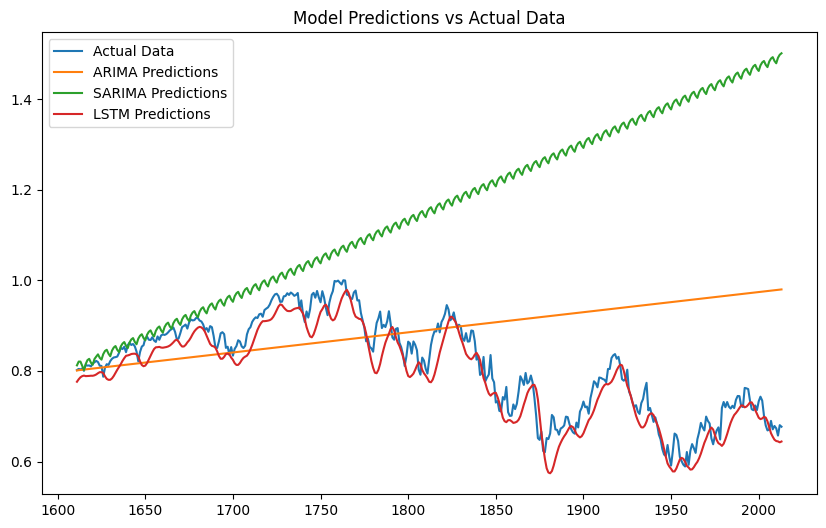

In [14]:
forecaster.plot_results()

In [15]:
forecaster.forecast_future()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━

{'LSTM': [0.64752436,
  0.64619744,
  0.6424033,
  0.63691413,
  0.6302287,
  0.6226964,
  0.61457217,
  0.6060504,
  0.597283,
  0.58839184,
  0.5794757,
  0.5706147,
  0.5618743,
  0.55330616,
  0.5449464,
  0.53681546,
  0.5289267,
  0.52128786,
  0.51390046,
  0.50676095,
  0.4998629,
  0.49319732,
  0.48675346,
  0.48051983,
  0.47448593,
  0.4686401,
  0.4629712,
  0.45746875,
  0.4521224,
  0.44692248]}